In [40]:
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2 

In [2]:
def preprocess(stft_signal_len,padding_mode = 'mean'):
    data_paths = ['dataset_new/aya_leg_move.csv','dataset_new/aya_leg_down.csv','dataset_new/aya_leg_up.csv']

    column_i = 0
    data_to_send = []
    ovr = []
    label_counter = 0
    skipped_counter = 0
    added_counter = 0
    y_label = []
    for each_data_class in data_paths:
        data = pd.read_csv(each_data_class)
        for record in data.values:
            if(record == '*****'):
                if(len(data_to_send) <= stft_signal_len):
                    ovr.append(stft_transform(stft_signal_len,data_to_send,mode=padding_mode))
                    #print(np.mean(data_to_send))
                    y_label.append(label_counter)
                    data_to_send = []
                    column_i += 1
                    added_counter += 1
                else:
                    skipped_counter += 1
            else:
                target_ = np.float16(np.nan_to_num(record[0],nan=0))
                data_to_send.append(target_)

                #data_to_send.append(np.float16(record[0]))
        print("Total skipped: ", skipped_counter)
        print("Total added:", added_counter)
        added_counter = 0
        skipped_counter = 0
        label_counter += 1
        data_to_send = []
    print("FINISHED")
    print(np.array(ovr).shape, np.array(y_label).shape)
    X_proceed = np.abs(ovr)
    y_label = np.array(y_label)
    print("Proceed shape:",  X_proceed.shape,"y_label shape:", y_label.shape)
    return X_proceed, y_label

In [4]:
def stft_transform(len_of_signal,data_to_send,mode='mean'):
    pad_length = len_of_signal
    n_fft = len_of_signal
    x = np.array(data_to_send)

    x_padded = np.pad(x, (0, pad_length - len(x)), mode=mode)

    X = librosa.stft(x_padded, n_fft=n_fft)

    #print("Shape of X:", x.shape)
    return X

In [6]:
def visualize_sample(D,sample_name):

    # Convert magnitude spectrogram to dB scale
    D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Visualize the STFT
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(D_db, sr=2048, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT Magnitude (dB) of ' + sample_name)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()


In [5]:
#EXPERIMENT WINDOW_SIZE=2048 BEGINS
##################################################################################################
X_proceed , y_label = preprocess(2048)

Total skipped:  7
Total added: 105
Total skipped:  0
Total added: 113
Total skipped:  0
Total added: 123
FINISHED
(341, 1025, 5) (341,)
Proceed shape: (341, 1025, 5) y_label shape: (341,)


Values: [[3.7451105e+04 6.8157422e+04 7.4903336e+04 6.8059234e+04 3.7403438e+04]
 [3.0375807e+04 4.0536043e+04 3.7421664e+04 4.0441637e+04 3.0284967e+04]
 [1.6058831e+04 5.7723633e+03 2.4122503e+01 5.6309092e+03 1.5890034e+04]
 ...
 [3.1584119e+02 2.3260860e+02 1.1716837e+01 1.8309380e+01 3.6562672e+01]
 [2.5762018e+02 2.0342313e+02 9.9615669e+00 1.8309315e+01 3.6562542e+01]
 [2.3529820e+02 1.9296663e+02 9.2642927e+00 1.8309294e+01 3.6562500e+01]]


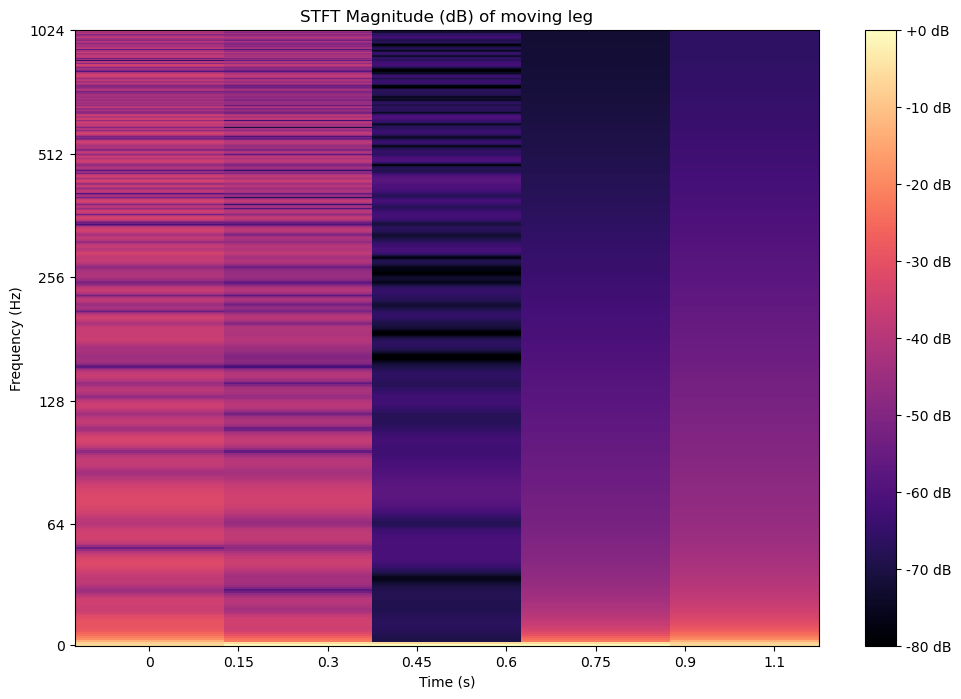

Values: [[2.3972124e+03 4.3906377e+03 4.8229536e+03 4.3736782e+03 2.4036504e+03]
 [1.9480797e+03 2.6292659e+03 2.4015916e+03 2.5988938e+03 1.9461974e+03]
 [1.0319868e+03 4.0734204e+02 1.1468912e+01 3.6185809e+02 1.0211384e+03]
 ...
 [4.9897228e+01 3.8356853e+01 3.6873186e+00 1.1766123e+00 2.3496203e+00]
 [4.2206932e+01 3.0653902e+01 1.8807951e+00 1.1766082e+00 2.3496122e+00]
 [3.9446758e+01 2.7694641e+01 9.7148202e-02 1.1766068e+00 2.3496094e+00]]


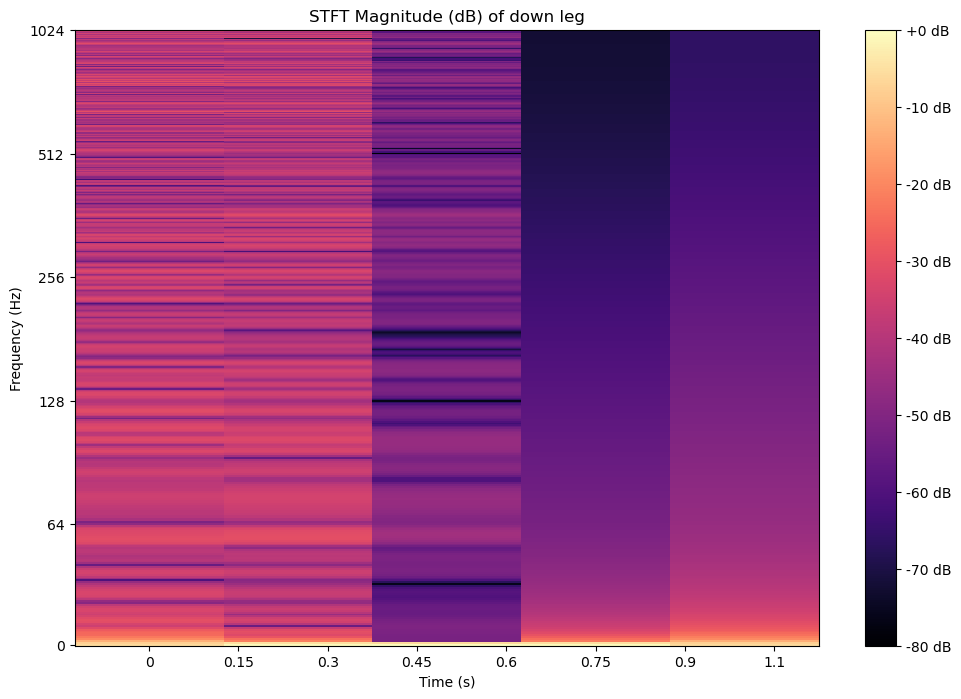

Values: [[1.7583319e+03 3.2194685e+03 3.5352737e+03 3.2066370e+03 1.7622773e+03]
 [1.4305331e+03 1.9272325e+03 1.7605261e+03 1.9054233e+03 1.4268878e+03]
 [7.6261047e+02 2.9897852e+02 7.2352138e+00 2.6530243e+02 7.4866504e+02]
 ...
 [8.2329544e+01 8.9588753e+01 1.9319405e+01 8.6265343e-01 1.7226644e+00]
 [9.3078712e+01 9.6940445e+01 1.9876970e+01 8.6265039e-01 1.7226583e+00]
 [9.7210114e+01 9.9783142e+01 2.0067230e+01 8.6264938e-01 1.7226562e+00]]


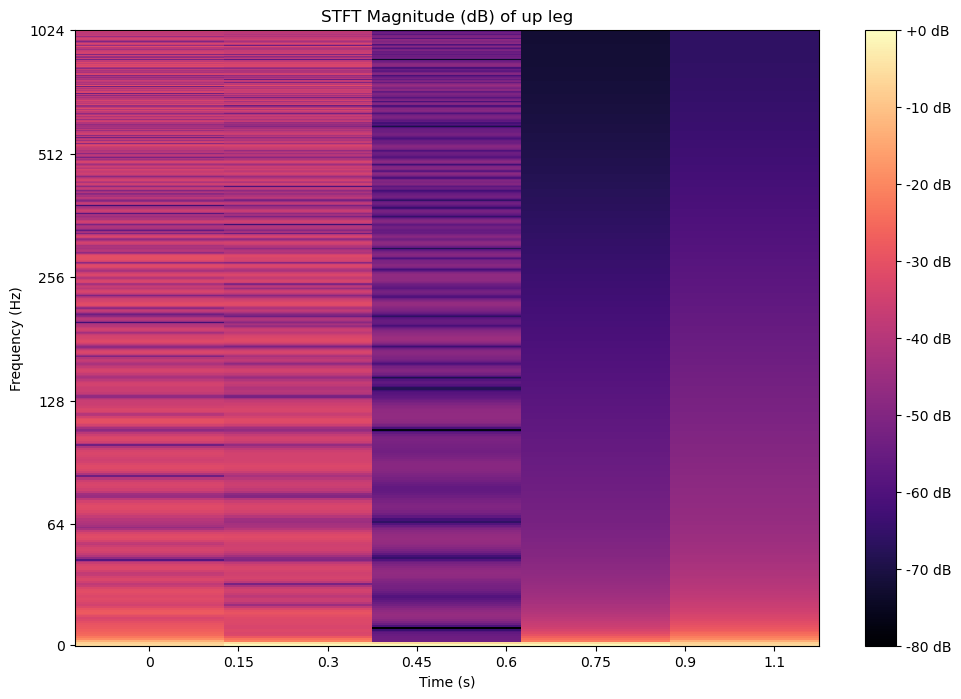

In [9]:
print("Values:", X_proceed[0])
visualize_sample(X_proceed[0], 'moving leg')#leg move
print("Values:", X_proceed[106])
visualize_sample(X_proceed[106], 'down leg') #up
print("Values:", X_proceed[220])
visualize_sample(X_proceed[220] ,'up leg') #down

In [60]:
def plot_confusion_matrix(model,x_test,y_test, normalize=False, title=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    !!!Ignore
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'


    predicted_labels = np.argmax(model.predict(x_test), axis=1)
    y_test = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_test, predicted_labels)

    # Plot confusion matrix
    #plot_confusion_matrix(cm, class_names=[str(i) for i in range(10)])
    #plt.show()
    classes = ['move','down','up']


    print('Confusion matrix, without normalization')
    title = 'Confusion matrix, without normalization'
    # Plot using seaborn's heatmap
    sns.set(font_scale=1.4) # Adjust font size if needed
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cbar=True,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
    title = 'Normalized confusion matrix'
    # Plot using seaborn's heatmap
    sns.set(font_scale=1.4) # Adjust font size if needed
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cbar=True,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [19]:
def visualize_loss_acc(history):
    plt.style.use('default')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [32]:
def build_a_neural_network_l2(X_proceed, y_label,epochs,lr,name_,apply_scaler=True):
    
    np.random.seed(0)
    
    if(apply_scaler == True):
        scaler = StandardScaler()
        X_proceed = scaler.fit_transform(X_proceed.reshape(-1, X_proceed.shape[-1])).reshape(X_proceed.shape)

    x_train, x_test, y_train, y_test = train_test_split(X_proceed, y_label, test_size=0.1, random_state=42,stratify=y_label)
    unique_category_count = 3
    y_train = tf.one_hot(y_train, unique_category_count)
    y_test = tf.one_hot(y_test, unique_category_count)

    # Define the model
    input_shape = X_proceed.shape[1:]

    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(optimizer= tf.keras.optimizers.Adam(lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Print the model summary
    model.summary()
    # Compile the model
    csv_logger = tf.keras.callbacks.CSVLogger('logs_v2/training' +name_ +'.log', separator=',', append=False)

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test),callbacks=[csv_logger])
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis = 1)
    y_true = np.argmax(y_test, axis = 1)


    print(y_test, y_pred)
    print(classification_report(y_true, y_pred))

    visualize_loss_acc(history)
    plot_confusion_matrix(model, x_test, y_test)

    return history, model

In [33]:
run_counter = 0

Total skipped:  7
Total added: 105
Total skipped:  0
Total added: 113
Total skipped:  0
Total added: 123
FINISHED
(341, 1025, 5) (341,)
Proceed shape: (341, 1025, 5) y_label shape: (341,)
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_75 (Conv1D)          (None, 1023, 32)          512       
                                                                 
 max_pooling1d_74 (MaxPooli  (None, 511, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_76 (Conv1D)          (None, 509, 64)           6208      
                                                                 
 max_pooling1d_75 (MaxPooli  (None, 254, 64)           0         
 ng1D)                                                           
                                                               

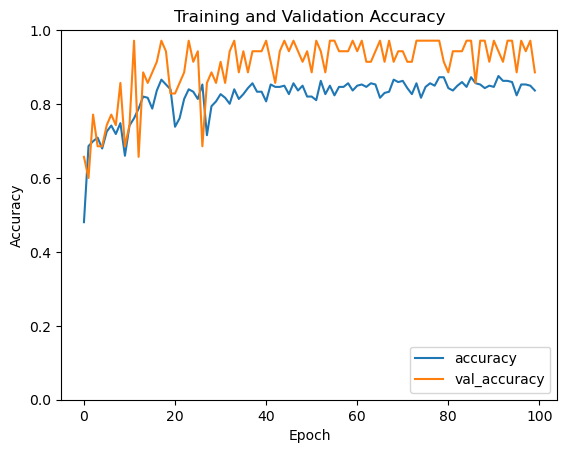

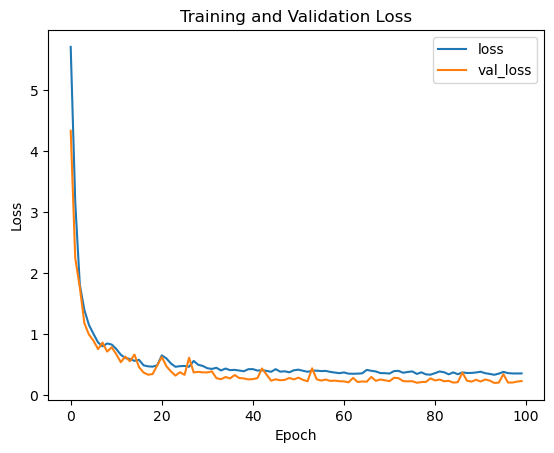

2/2 [==============================] - 0s 3ms/step
Confusion matrix, without normalization


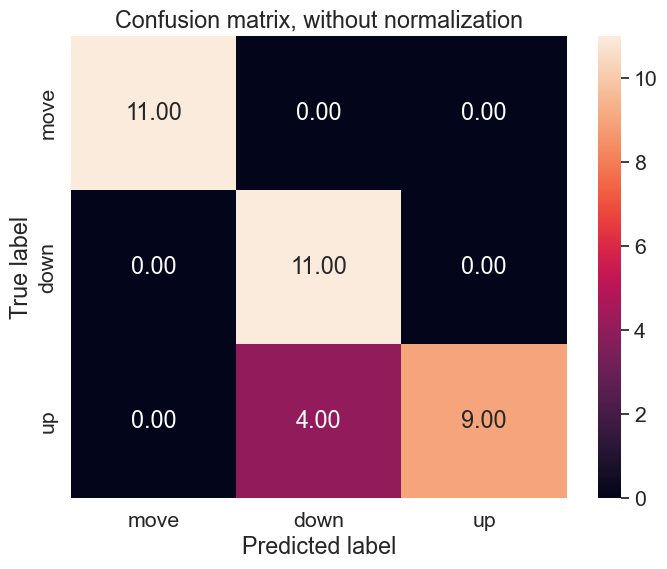

Normalized confusion matrix


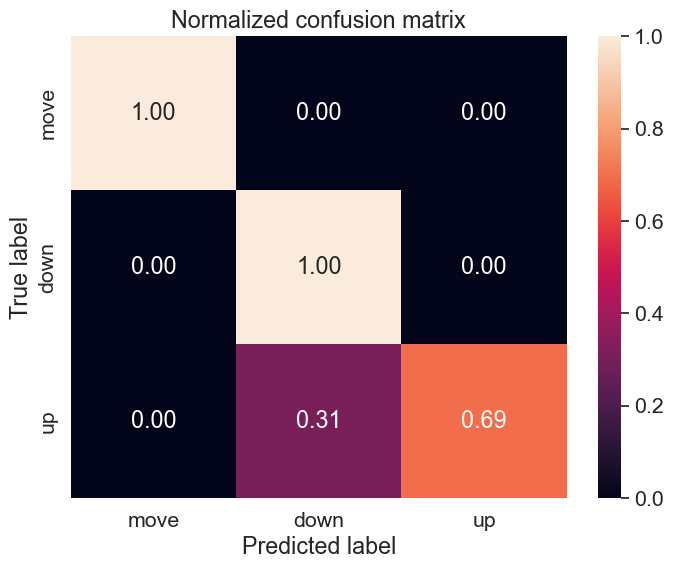

In [61]:
X_proceed , y_label = preprocess(2048)

epochs=100
lr=0.01
time_to_add = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
name='REMOVE_modified_cnn_' + str(epochs) + '_lr_'+ str(lr) + '_launch_' + str(time_to_add)
history, model = build_a_neural_network_l2(X_proceed, y_label,epochs=epochs, lr=lr, name_=name)
now=datetime.datetime.now()
run_counter += 1

In [ ]:
#Without L2, old

In [58]:
def build_a_neural_network(X_proceed, y_label,epochs,lr,name_,apply_scaler=True):
    
    np.random.seed(0)
    
    if(apply_scaler == True):
        scaler = StandardScaler()
        X_proceed = scaler.fit_transform(X_proceed.reshape(-1, X_proceed.shape[-1])).reshape(X_proceed.shape)

    x_train, x_test, y_train, y_test = train_test_split(X_proceed, y_label, test_size=0.1, random_state=42,stratify=y_label)
    unique_category_count = 3
    y_train = tf.one_hot(y_train, unique_category_count)
    y_test = tf.one_hot(y_test, unique_category_count)

    # Define the model
    input_shape = X_proceed.shape[1:]

    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(optimizer= tf.keras.optimizers.Adam(lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Print the model summary
    model.summary()
    # Compile the model
    csv_logger = tf.keras.callbacks.CSVLogger('logs_v2/training' +name_ +'.log', separator=',', append=False)

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test),callbacks=[csv_logger])
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis = 1)
    y_true = np.argmax(y_test, axis = 1)


    print(y_test, y_pred)
    print(classification_report(y_true, y_pred))

    visualize_loss_acc(history)
    plot_confusion_matrix(model, x_test, y_test)

    return history, model

Total skipped:  7
Total added: 105
Total skipped:  0
Total added: 113
Total skipped:  0
Total added: 123
FINISHED
(341, 1025, 5) (341,)
Proceed shape: (341, 1025, 5) y_label shape: (341,)
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_77 (Conv1D)          (None, 1023, 32)          512       
                                                                 
 max_pooling1d_76 (MaxPooli  (None, 511, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_78 (Conv1D)          (None, 509, 64)           6208      
                                                                 
 max_pooling1d_77 (MaxPooli  (None, 254, 64)           0         
 ng1D)                                                           
                                                               

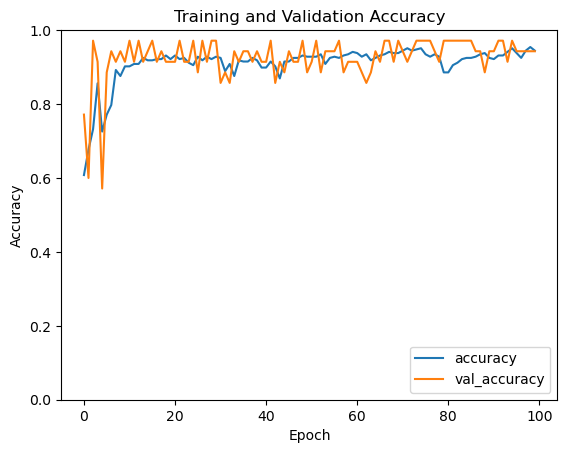

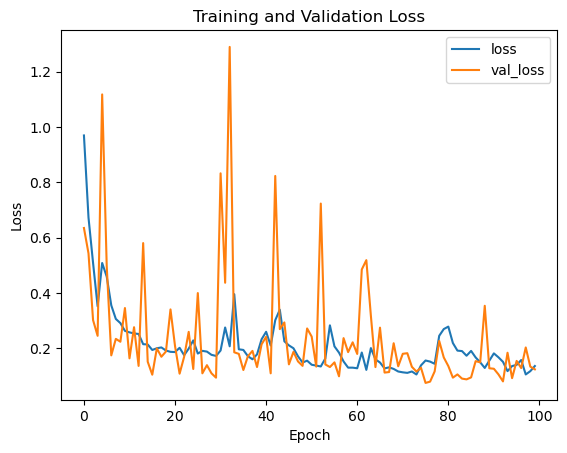

2/2 [==============================] - 0s 3ms/step
Confusion matrix, without normalization


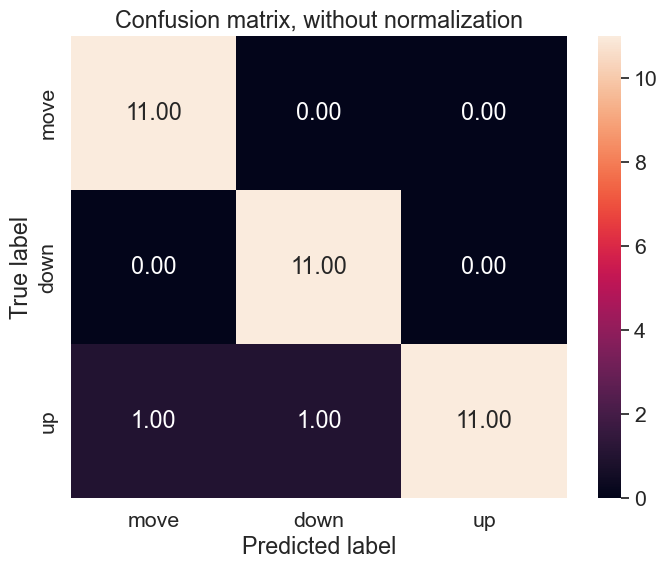

Normalized confusion matrix


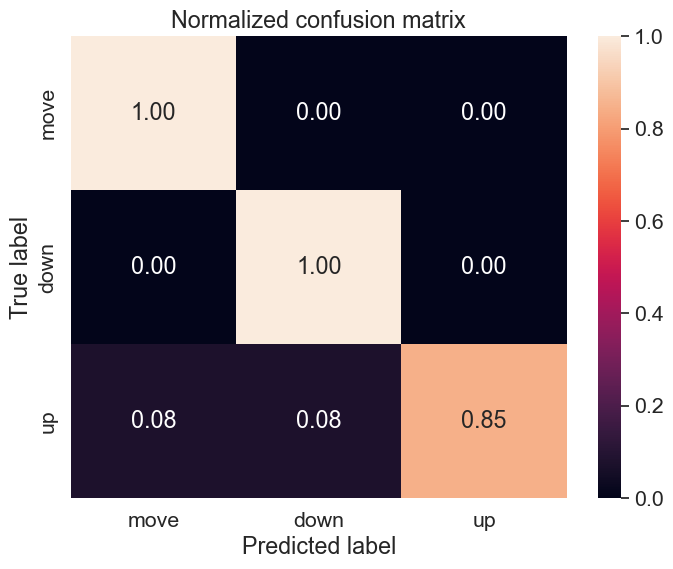

In [62]:
X_proceed , y_label = preprocess(2048)

epochs=100
lr=0.01
time_to_add = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
name='REMOVE_modified_cnn_' + str(epochs) + '_lr_'+ str(lr) + '_launch_' + str(time_to_add)
history, model = build_a_neural_network(X_proceed, y_label,epochs=epochs, lr=lr, name_=name)
now=datetime.datetime.now()
run_counter += 1

In [ ]:
#model.save('v2_experiments/' + str(time_to_add)+'run_' + str(run_counter)+'_nsemg_v2_modified_cnn_100_adam_v2_stratify_True.keras')

## Add Kfold validation

In [47]:
def model_only_for_kfold(X_proceed, y_label):
    
    np.random.seed(0)

    input_shape = X_proceed.shape[1:]

    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer= tf.keras.optimizers.Adam(lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [48]:
def kfold_stratified(X_proceed, y_label):
    k = 10
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    epochs = 10
    accuracies = []

    scaler = StandardScaler()
    unique_category_count = 3

    X_proceed = scaler.fit_transform(X_proceed.reshape(-1, X_proceed.shape[-1])).reshape(X_proceed.shape)
    
    for train_index, val_index in kf.split(X_proceed,y_label):
        X_train, X_val = X_proceed[train_index], X_proceed[val_index]
        y_train, y_val = y_label[train_index], y_label[val_index]
        y_train = tf.one_hot(y_train, unique_category_count)
        y_val = tf.one_hot(y_val, unique_category_count)

        model = model_only_for_kfold(X_train, y_train)
        model.fit(X_train, y_train, epochs=epochs, batch_size=32)
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        accuracies.append(val_accuracy)

    print('Mean accuracy:', np.mean(accuracies))
    print(accuracies)

In [49]:
kfold_stratified(X_proceed, y_label)

Epoch 1/10
10/10 [==============================] - 1s 8ms/step - loss: 0.9182 - accuracy: 0.6046
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 0.6067 - accuracy: 0.6699
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.5331 - accuracy: 0.7353
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.5265 - accuracy: 0.6993
Epoch 5/10
10/10 [==============================] - 0s 7ms/step - loss: 0.5079 - accuracy: 0.7712
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.3874 - accuracy: 0.8203
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 0.3028 - accuracy: 0.8562
Epoch 8/10
10/10 [==============================] - 0s 8ms/step - loss: 0.3606 - accuracy: 0.8627
Epoch 9/10
10/10 [==============================] - 0s 7ms/step - loss: 0.3400 - accuracy: 0.8105
Epoch 10/10
10/10 [==============================] - 0s 8ms/step - loss: 0.2674 - accuracy: 0.8889
Epoch 1/10
10/10 [=

In [53]:
def model_only_for_kfold_with_l2(X_proceed, y_label):
    
    np.random.seed(0)
    lr=0.01
    input_shape = X_proceed.shape[1:]

    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer= tf.keras.optimizers.Adam(lr), loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [56]:
def kfold_stratified_with_l2(X_proceed, y_label):
    k = 10
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    epochs = 50 #more epochs because of L2
    accuracies = []
    
    scaler = StandardScaler()
    unique_category_count = 3
    
    X_proceed = scaler.fit_transform(X_proceed.reshape(-1, X_proceed.shape[-1])).reshape(X_proceed.shape)

    for train_index, val_index in kf.split(X_proceed,y_label):
        X_train, X_val = X_proceed[train_index], X_proceed[val_index]
        y_train, y_val = y_label[train_index], y_label[val_index]
        y_train = tf.one_hot(y_train, unique_category_count)
        y_val = tf.one_hot(y_val, unique_category_count)

        model = model_only_for_kfold_with_l2(X_train, y_train)
        model.fit(X_train, y_train, epochs=epochs, batch_size=32)
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        accuracies.append(val_accuracy)

    print('Mean accuracy:', np.mean(accuracies))
    print(accuracies)

In [57]:
kfold_stratified_with_l2(X_proceed, y_label)

Epoch 1/50
10/10 [==============================] - 1s 8ms/step - loss: 4.8174 - accuracy: 0.5556
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 2.4526 - accuracy: 0.6928
Epoch 3/50
10/10 [==============================] - 0s 8ms/step - loss: 1.3566 - accuracy: 0.8039
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 1.2023 - accuracy: 0.7484
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9649 - accuracy: 0.7941
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.8533 - accuracy: 0.7712
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.7599 - accuracy: 0.8170
Epoch 8/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6716 - accuracy: 0.8497
Epoch 9/50
10/10 [==============================] - 0s 8ms/step - loss: 0.6305 - accuracy: 0.8268
Epoch 10/50
10/10 [==============================] - 0s 7ms/step - loss: 0.5893 - accuracy: 0.8431
Epoch 11/50
10/10 [